## 06 - Colour Images
### Part 1 - Processing images in different colour spaces

Colour in images can be codified using different models. The most often used is the additive RGB model, in which each pixel is codified by 3 bytes, each corresponding to the amount of Red, Green and Blue light that contributes to that specific pixel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio

from scipy import ndimage

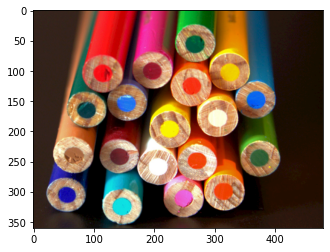

In [3]:
img = imageio.imread("images/pencil2_RGB.png")
plt.imshow(img)

Text(0.5, 1.0, 'Blue')

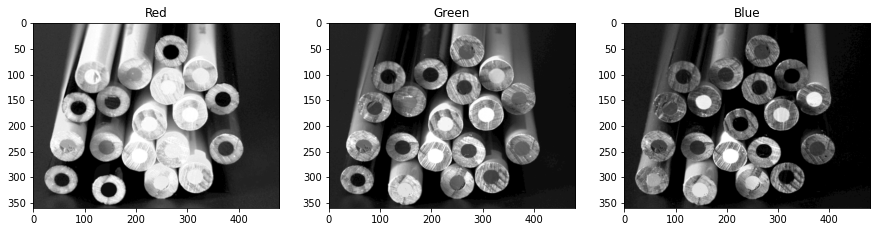

In [4]:
# showing each channel separately
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img[:,:,0], cmap="gray"); plt.title("Red")
plt.subplot(132); plt.imshow(img[:,:,1], cmap="gray"); plt.title("Green")
plt.subplot(133); plt.imshow(img[:,:,2], cmap="gray"); plt.title("Blue")

This way we can decompose the image into three matrices and process them. For example, we could increase the brighness of only RED channel

Text(0.5, 1.0, 'adding to blue channel')

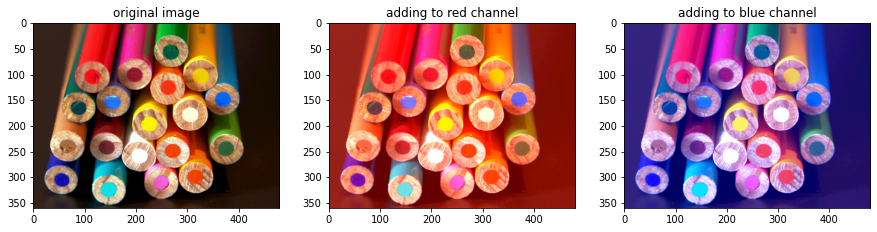

In [5]:
# adding to R channel to process the image
img_redb = np.array(img, copy=True).astype(np.uint32)
img_redb[:,:,0] = np.clip(img_redb[:,:,0]+100, 0, 255)

# adding to B channel to process the image
img_blub = np.array(img, copy=True).astype(np.uint32)
img_blub[:,:,2] = np.clip(img_blub[:,:,2]+100, 0, 255)

plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img); plt.title("original image")
plt.subplot(132); plt.imshow(img_redb); plt.title("adding to red channel")
plt.subplot(133); plt.imshow(img_blub); plt.title("adding to blue channel")

Colour channels may be also mixed to create effects


Text(0.5, 1.0, 'mixing colours')

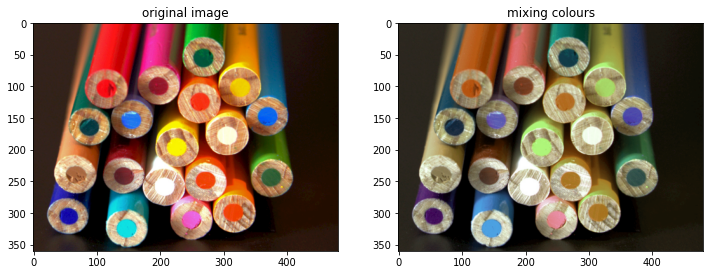

In [6]:
# adding to R channel to process the image
img_colormix = np.array(img, copy=True).astype(np.uint32)
img_colormix[:,:,0] = np.clip(0.7*img[:,:,0].astype(np.uint32) + 0.3*img[:,:,2].astype(np.uint32), 0, 255)
img_colormix[:,:,1] = np.clip(0.7*img[:,:,1].astype(np.uint32) + 0.3*img[:,:,0].astype(np.uint32), 0, 255)
img_colormix[:,:,2] = np.clip(0.5*img[:,:,2].astype(np.uint32) + 0.5*img[:,:,1].astype(np.uint32), 0, 255)

plt.figure(figsize=(12,10))
plt.subplot(121); plt.imshow(img); plt.title("original image")
plt.subplot(122); plt.imshow(img_colormix); plt.title("mixing colours")


### Processing colour images

In order to process colour images, for example enhance them, we could repeat the process in all channels individually.
However, this may have undersired effects, creating the colours to be unbalanced.

In [7]:
def gamma_enhancement(img, gamma):
    R = 255.0
    return (R * np.power(img.astype(np.uint32) / R, gamma)).astype(np.uint8)

Text(0.5, 1.0, 'linearized sRGB')

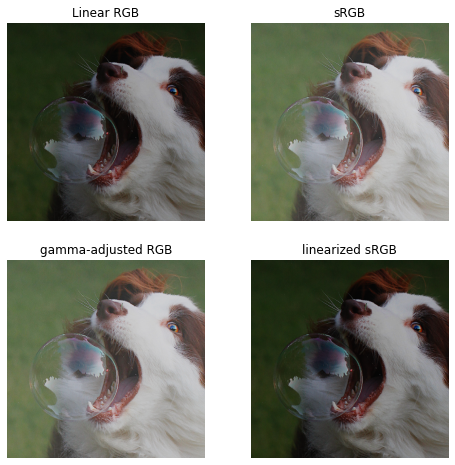

In [10]:
img1 = imageio.imread("images/dog_linear.jpg") # mountain.jpg
img2 = imageio.imread("images/dog.jpg")
plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(img1); plt.axis('off'); plt.title('Linear RGB')
plt.subplot(222); plt.imshow(img2); plt.axis('off'); plt.title('sRGB')
plt.subplot(223); plt.imshow(gamma_enhancement(img1, 1/2.2)); plt.axis('off'); plt.title('gamma-adjusted RGB')
plt.subplot(224); plt.imshow(gamma_enhancement(img2, 2.2)); plt.axis('off'); plt.title('linearized sRGB')

This is because performing operations directly on sRGB may not match real-world color perception. Most images are written in sRGB for compatibility.

Other color systems can be used
* HSV
* Lab
* ...

In [11]:
def gaussian_rgb(img, sigma=2):
    img_colors = np.array(img, copy=True).astype(np.uint32)
    img_colors[:,:,0] = ndimage.gaussian_filter(img_colors[:,:,0].astype(np.uint32),sigma=sigma)
    img_colors[:,:,1] = ndimage.gaussian_filter(img_colors[:,:,1].astype(np.uint32),sigma=sigma)
    img_colors[:,:,2] = ndimage.gaussian_filter(img_colors[:,:,2].astype(np.uint32),sigma=sigma)
    return img_colors.astype(np.uint8)

def gaussian_srgb(img, sigma=2):
    img_colors = np.array(img, copy=True).astype(np.uint32)**2.2
    img_colors[:,:,0] = ndimage.gaussian_filter(img_colors[:,:,0].astype(np.uint32),sigma=sigma)
    img_colors[:,:,1] = ndimage.gaussian_filter(img_colors[:,:,1].astype(np.uint32),sigma=sigma)
    img_colors[:,:,2] = ndimage.gaussian_filter(img_colors[:,:,2].astype(np.uint32),sigma=sigma)
    img_colors = img_colors**(1/2.2)
    return img_colors.astype(np.uint8)

Text(0.5, 1.0, 'RGB')

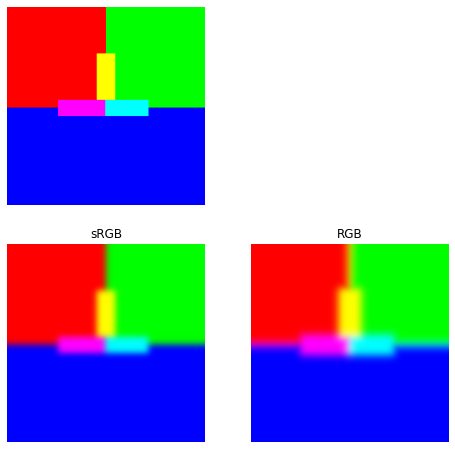

In [15]:
img_colors = imageio.imread("images/colors2.png")

img_c1 = gaussian_rgb(img_colors, sigma=4)
img_c2 = gaussian_srgb(img_colors, sigma=4)

plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(img_colors); plt.axis('off')
plt.subplot(223); plt.imshow(img_c1); plt.axis('off'); plt.title('sRGB')
plt.subplot(224); plt.imshow(img_c2); plt.axis('off'); plt.title('RGB')

### Processing images in alternative colour systems

For example HSV decomposes the chromatic component, or Hue (H), the saturation of each color (S) and the value (V) which is the illumination component. Therefore, we may process only the channel we are interested.

Let us show each channel (H - S - V) separately for inspection.

Text(0.5, 1.0, 'Value')

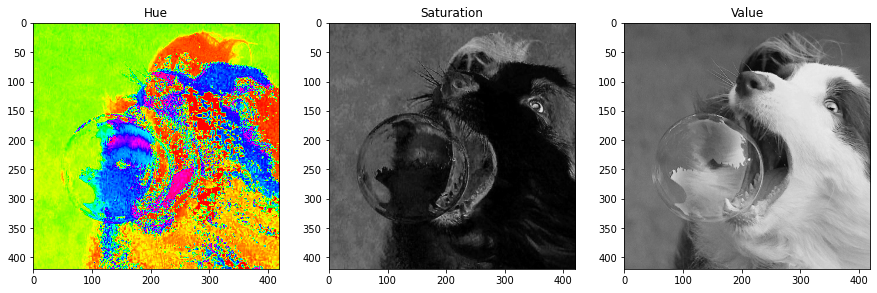

In [18]:
img_hsv = mpl.colors.rgb_to_hsv(img2)
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img_hsv[:,:,0], cmap="hsv"); plt.title("Hue");
plt.subplot(132); plt.imshow(img_hsv[:,:,1], cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(img_hsv[:,:,2], cmap="gray"); plt.title("Value")

In [19]:
# applies sigmoidal contrast enhancement to all pixels equally
def contrast(img, k=0.035):
    return (255/(1+np.exp(-k*(img.astype(np.int32)-127)))).astype(np.uint8)
    
# now this function applies the contrast adjustment
# without modifying any chromatic component
def contrast_hsv(img, k=0.035):
    img_hsv = mpl.colors.rgb_to_hsv(img)
    img_hsv[:,:,2] = contrast(img_hsv[:,:,2].astype(np.uint32), k=k)
    return mpl.colors.hsv_to_rgb(img_hsv).astype(np.uint8)

(-0.5, 419.5, 419.5, -0.5)

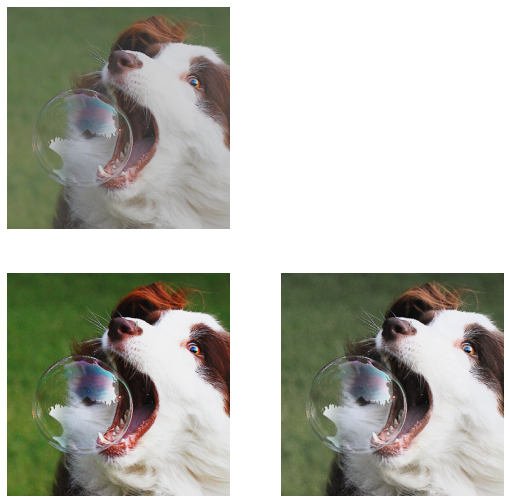

In [20]:
img_c_hsv = contrast_hsv(img2)
img_c = contrast(img2)

plt.figure(figsize=(9,9))
plt.subplot(221); plt.imshow(img2); plt.axis('off')
plt.subplot(223); plt.imshow(img_c); plt.axis('off')
plt.subplot(224); plt.imshow(img_c_hsv); plt.axis('off')